In [57]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [58]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import plotly.express as px
from matplotlib.pyplot import figure
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import Perceptron
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [59]:
df=pd.read_csv('/content/drive/MyDrive/hotel_bookings.csv')

# Displaying the data
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [60]:
#To Check if there are any Null Values
df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [61]:
# To fill the missing values
df1=df['children'].fillna(0, inplace=True)
df1=df['agent'].fillna(0, inplace=True)


In [62]:
# Dropping the company column 
df1=df.drop(['company'], axis=1)

In [63]:
# Renameing the column adr to average_daily_rate
df1=df1.rename(columns={"adr": "average_daily_rate"})

In [64]:
#Imputing the null values with mode of the column
df1['country']= df["country"].fillna(df["country"].mode()[0])

In [65]:
#Checking Null values after performing tasks to remove NA
df1.isna().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
average_daily_rate                0
required_car_parking_spaces 

In [66]:
# Displaying the data
df1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,average_daily_rate,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


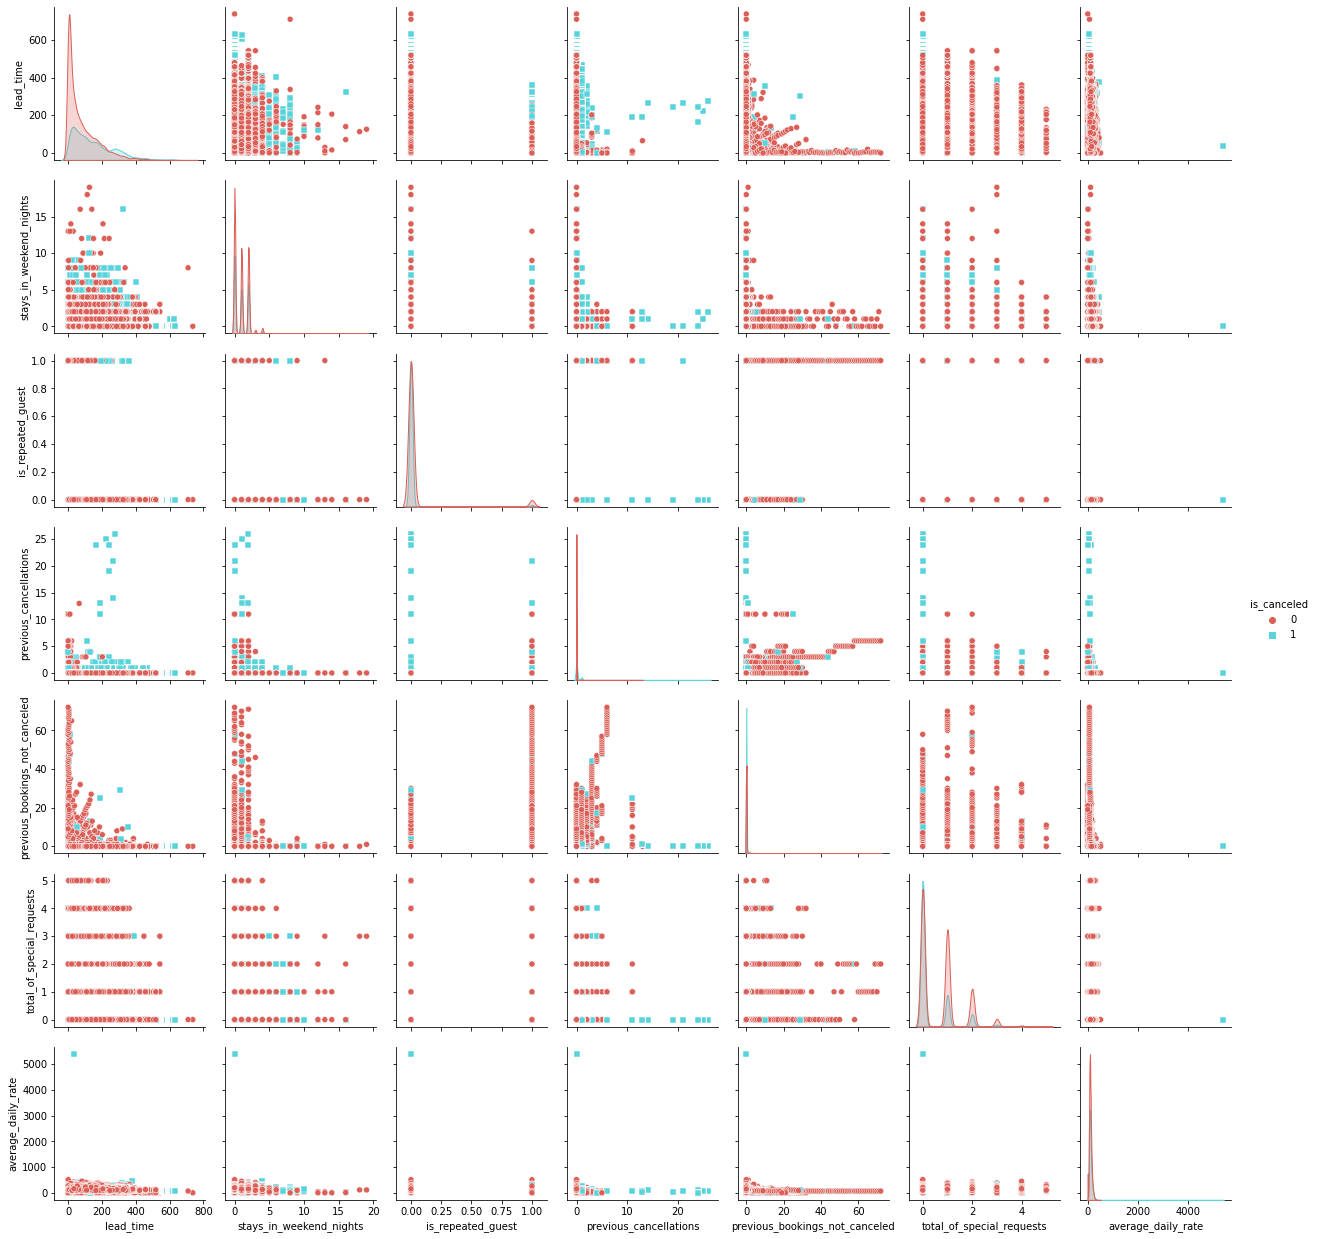

In [11]:
# Plotting pair plot for selected variables
sns.pairplot(df1[['is_canceled','lead_time','stays_in_weekend_nights','is_repeated_guest','previous_cancellations', 'previous_bookings_not_canceled', 'total_of_special_requests', 'average_daily_rate']], hue = "is_canceled", palette='hls', markers=["o", "s"])
plt.show()

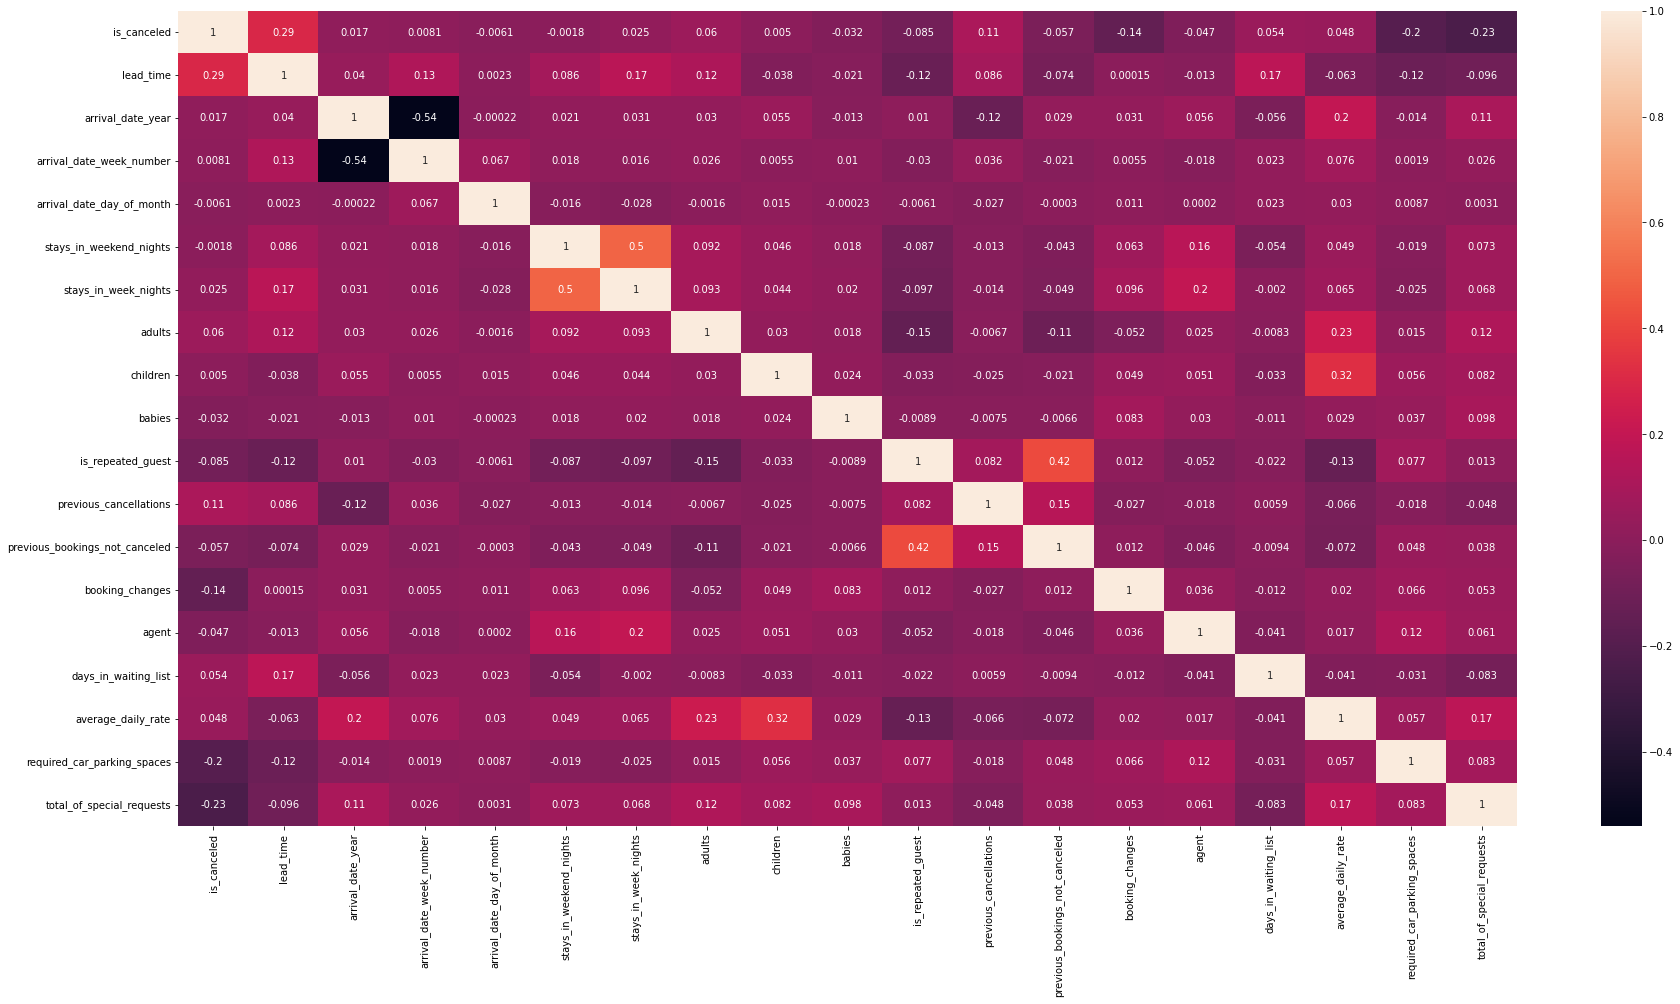

In [67]:
# Plotting Correlation heat map
plt.figure(figsize=(30,15))
sns.heatmap(df1.corr(),annot=True)

plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [68]:
#Performing Groupby to find the count
test=df1.loc[df1['is_canceled']==0]
ms = pd.DataFrame(test.groupby(["market_segment", "is_canceled"])['is_canceled'].count())
ms=ms.rename(columns={"is_canceled": "value"})
ms=ms.reset_index()
ms

,market_segment,is_canceled,value
0,Aviation,0,185
1,Complementary,0,646
2,Corporate,0,4303
3,Direct,0,10672
4,Groups,0,7714
5,Offline TA/TO,0,15908
6,Online TA,0,35738


In [69]:
#No of bookings canceled by Market Segment
fig = px.bar(ms, x='market_segment', y='value',title="No of bookings canceled by Market Segment")
fig.show()

In [ ]:
# Filtering the previous_cancellations and is_repeated_guest column values to be greater than 0
df_lot = df1[df1['previous_cancellations'] > 0]
df_lot = df_lot[df_lot['is_repeated_guest'] > 0]
df_lot

In [17]:
plt1 = pd.DataFrame(df_lot.groupby(["previous_cancellations"])['previous_cancellations'].count())
plt1 = plt1.rename(columns={"previous_cancellations": "value"})
plt1= plt1.reset_index()
plt1

,previous_cancellations,value
0,1,693
1,2,76
2,3,52
3,4,31
4,5,19
5,6,16
6,11,27
7,13,12
8,21,1


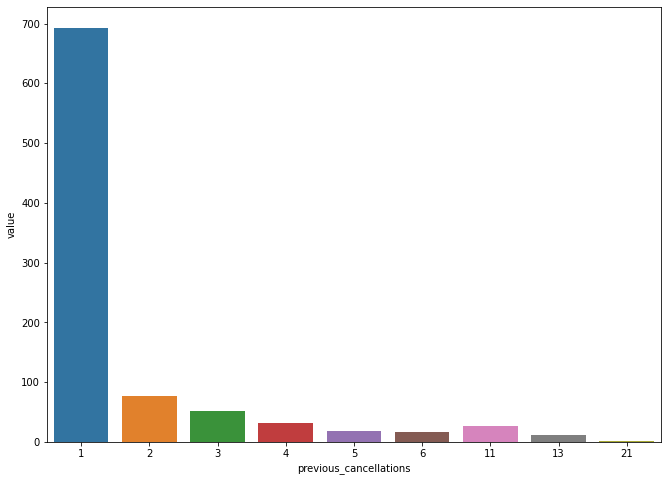

In [18]:
# Plotting the previous cancelations by count  
plt.figure(figsize=(11,8))
sns.barplot(x = 'previous_cancellations',
            y = 'value',
            data = plt1)

In [19]:
#Performing Groupby to find the count
bar = pd.DataFrame(df1.groupby(["arrival_date_month", "is_canceled"])['is_canceled'].count())
bar=bar.rename(columns={"is_canceled": "value"})
bar=bar.reset_index()
bar

,arrival_date_month,is_canceled,value
0,April,0,6565
1,April,1,4524
2,August,0,8638
3,August,1,5239
4,December,0,4409
5,December,1,2371
6,February,0,5372
7,February,1,2696
8,January,0,4122
9,January,1,1807


In [20]:

fig = px.bar(bar, x="arrival_date_month", y="value",
             color='is_canceled', barmode='group',
             height=400,color_continuous_scale='magenta')
fig.show()

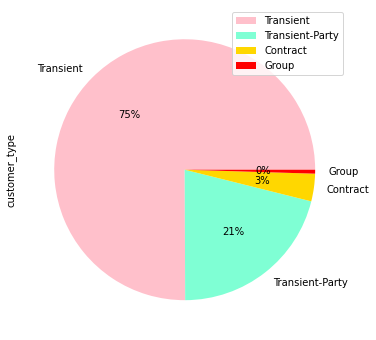

In [21]:
# Plotting pie chart for customer_types
customer_types = pd.DataFrame(df1['customer_type'].value_counts()) 
colors = ['pink', 'aquamarine', 'gold', 'red']
customer_types.plot.pie(y='customer_type', autopct='%1.0f%%', figsize=(6, 6), colors=colors)


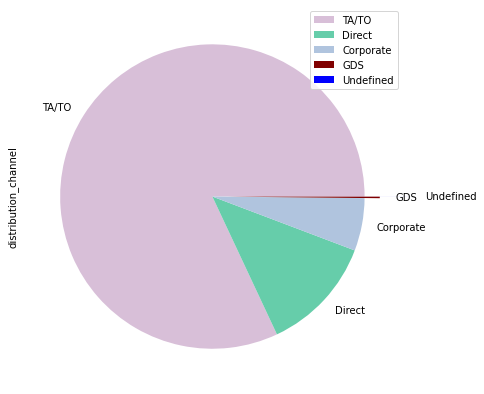

In [22]:
# Plotting pie chart for market_segments
market_segments = pd.DataFrame(df1['distribution_channel'].value_counts()) 
colors = ['thistle', 'mediumaquamarine', 'lightsteelblue','maroon', 'blue']
market_segments.plot.pie(y='distribution_channel', explode = (0, 0, 0, 0.1, 0.3), figsize=(7, 7), colors=colors)

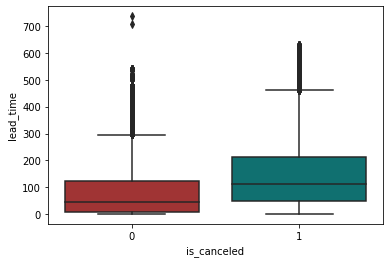

In [23]:
# Plotting box plot for lead time vs is_canceled
colors = ['firebrick', 'teal']
sns.boxplot(x = 'is_canceled', y = 'lead_time', data = df1, palette=colors)
sns.rc={"figure.figsize":(8, 8)} 

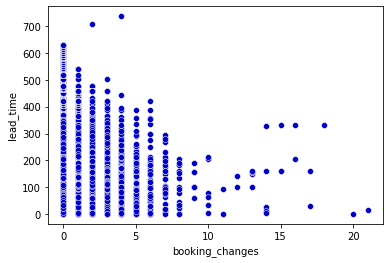

In [24]:
# Plotting scatter plot for booking_changes vs lead_time
sns.scatterplot(x="booking_changes", y="lead_time", data=df1, color = 'mediumblue')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 0, 'Bookings Cancelled')

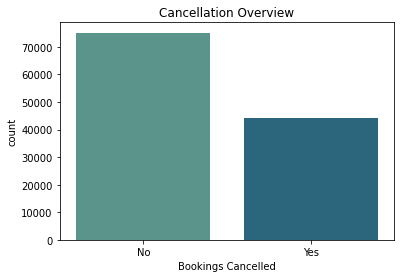

In [25]:
# Plotting a bar chart using is_canceled column to see how many bookings are cancelled and are not cancelled
cancelled_data = df1['is_canceled'].replace([1,0],["Yes","No"])

sns.countplot(cancelled_data, palette = 'crest').set_title("Cancellation Overview")
plt.xlabel("Bookings Cancelled")


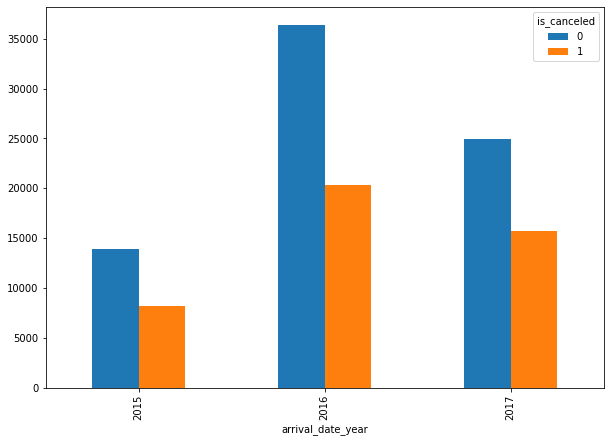

In [26]:
df.groupby("arrival_date_year")["is_canceled"].value_counts().unstack().plot.bar(figsize=(10,7))
                                           

In [30]:
df1[['country','arrival_date_month','is_canceled','stays_in_weekend_nights','stays_in_week_nights','adults']].mode()

,country,arrival_date_month,is_canceled,stays_in_weekend_nights,stays_in_week_nights,adults
0,PRT,August,0,0,2,2


In [33]:
df1[['is_canceled','lead_time','stays_in_weekend_nights','stays_in_week_nights','adults','children','is_repeated_guest','previous_cancellations','previous_bookings_not_canceled']].describe()

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,0.927599,2.500302,1.856403,0.103886,0.031912,0.087118,0.137097
std,0.482918,106.863097,0.998613,1.908286,0.579261,0.398555,0.175767,0.844336,1.497437
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,160.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,737.000000,19.000000,50.000000,55.000000,10.000000,1.000000,26.000000,72.000000


In [34]:
#Extracting the required data to plot Choropleth Map
test1=df['country'].value_counts()
a=pd.DataFrame(data=test1)
a=a.reset_index()

In [35]:
a=a.rename(columns={"index": "Country"})
a=a.rename(columns={"country": "Total no.of entries"})

In [36]:
#Plotting Choropleth Map
fig = px.choropleth(a, locations='Country',
                    color_continuous_scale='Viridis_r',
                    color=pd.cut(a["Total no.of entries"], bins=range(0, 49000, 150)).astype(str),
                     hover_name="Total no.of entries",
                    hover_data={"Total no.of entries":True})
                    
                     


fig.show()

In [ ]:
#Extracting data to plot 
df2=df1.loc[df['is_canceled']==1]
df3=df2[['arrival_date_year','arrival_date_month','is_canceled']]
months = ['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November','December']
df3['arrival_date_month'] = pd.Categorical(df3['arrival_date_month'], categories = months)
df3.sort_values(by = 'arrival_date_month')
df4=pd.pivot_table(data=df3,index=['arrival_date_month'], 
                        columns=['arrival_date_year'], 
                        values='is_canceled',
                        aggfunc='sum')

In [38]:
#Plotting Interactive plot
def multi_plot(df4, title, addAll = True):
    fig = go.Figure()

    for column in df4.columns.to_list():
        fig.add_trace(
            go.Bar(
                x = df4.index,
                y = df4[column],
                name = column
            )
        )

    button_all = dict(label = 'All',
                      method = 'update',
                      args = [{'visible':df4.columns.isin(df4.columns),
                               'title': 'All',
                               'showlegend':True}])

    def create_layout_button(column):
        return dict(label = column,
                    method = 'update',
                    args = [{'visible': df4.columns.isin([column]),
                             'title': column,
                             'showlegend': True}])

    fig.update_layout(
        updatemenus=[go.layout.Updatemenu(
            active = 0,
            buttons = ([button_all] * addAll) + list(df4.columns.map(lambda column: create_layout_button(column)))
            )
        ],
         yaxis_type="log"       
    )
    # Update remaining layout properties
    fig.update_layout(
        title_text=title,
        height=800,
        xaxis_title="Plan", 
        yaxis_title="Count"
        
    )
   
    fig.show()
    
multi_plot(df4, title="To be decided") 

## *Dimension Reduction*

**PCA**

In [70]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

df6 = df1[['is_canceled', 'lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies','is_repeated_guest', 
          'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'agent', 'days_in_waiting_list', 'required_car_parking_spaces', 'total_of_special_requests' ]]

# standardizing the data
X_sze = StandardScaler().fit_transform(df6.values)
X_sze

# performing the same procedure on standardized data
P_sze = PCA()
P_sze.fit(X_sze)

# Dataframe consisting of the explained variance, proportion variance, and cummulative proportion of variance
PC_sze = {'Explained Variance' : P_sze.explained_variance_, 'Proportion Variance': P_sze.explained_variance_ratio_, 'Cumulative Proportion Variance': P_sze.explained_variance_ratio_.cumsum() }
PC_sze = pd.DataFrame(PC_sze)
PC_sze

,Explained Variance,Proportion Variance,Cumulative Proportion Variance
0,1.876338,0.125088,0.125088
1,1.728735,0.115248,0.240336
2,1.371543,0.091435,0.331772
3,1.084526,0.072301,0.404073
4,1.071242,0.071416,0.475488
5,1.005952,0.067063,0.542551
6,0.995268,0.066351,0.608902
7,0.955352,0.063690,0.672591
8,0.899736,0.059982,0.732573
9,0.833080,0.055538,0.788112


In [ ]:
# Present the first two principal component scores
PC_sze = pd.DataFrame(P_sze.transform(X_sze))

PC_sze.iloc[:, 0:2]

PC_sze


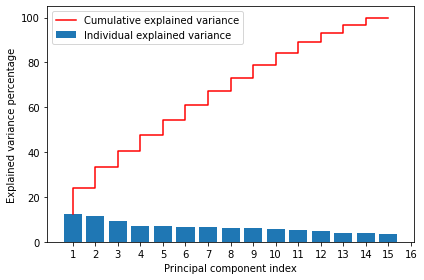

In [73]:
# Plotting individual and Cumulative explained variance
pca = PCA(n_components=None)
pca.fit(X_sze)
np.add.reduce(X_sze)
exp_var = pca.explained_variance_ratio_ * 100
cum_exp_var = np.cumsum(exp_var)
plt.bar(range(1,16), exp_var, align='center',
      label='Individual explained variance')

plt.step(range(1, 16), cum_exp_var, 
         label='Cumulative explained variance', color='red')

plt.ylabel('Explained variance percentage')
plt.xlabel('Principal component index')
plt.xticks(ticks=[1, 2, 3, 4,5,6,7,8,9,10,11,12,13,14,15,16])
plt.legend(loc='best')
plt.tight_layout()

plt.savefig("Barplot.png")


In [74]:
#Converting string values to integer
months = {'January':'01', 'February':'02', 'March':'03', 'April':'04', 'May':'05', 'June':'06', 'July':'07', 'August':'08', 'September':'09', 'October':'10', 'November':'11', 'December':'12'}
df1.arrival_date_month = df1.arrival_date_month.map(months).astype(int)

In [75]:
#Calculating total no.of bookings
df1['total_bookings'] = df1['previous_cancellations'] + df1['previous_bookings_not_canceled']

In [76]:
#Dropping unnecessary columns from the dataframe 
df1.drop(['meal', 'assigned_room_type', 'reserved_room_type', 'reservation_status', 'reservation_status_date', 'country'], axis=1, inplace=True)

In [77]:
#Converting string values to integer
for i in range(len(df1)):
    if df1.loc[i, 'hotel'] == 'City Hotel':
        df1.at[i, 'hotel'] = 0
    else:
        df1.at[i, 'hotel'] = 1

In [78]:
#Converting string values to integer
for i in range(len(df1)):
    if df1.loc[i, 'customer_type'] == 'Online TA':
        df1.at[i, 'customer_type'] = 0
    elif df1.loc[i, 'customer_type'] == 'Transient-Party':
        df1.at[i, 'customer_type'] = 1
    elif df1.loc[i, 'customer_type'] == 'Contract':
        df1.at[i, 'customer_type'] = 2
    else:
        df1.at[i, 'customer_type'] = 3

In [79]:
#Converting string values to integer
for i in range(len(df1)):
    if df1.loc[i, 'deposit_type'] == 'No Deposit':
        df1.at[i, 'deposit_type'] = 0
    elif df1.loc[i, 'deposit_type'] == 'Non Refund':
        df1.at[i, 'deposit_type'] = 1
    else:
        df1.at[i, 'deposit_type'] = 2

In [80]:
#Converting string values to integer
for i in range(len(df1)):
    if df1.loc[i, 'market_segment'] == 'Transient':
        df1.at[i, 'market_segment'] = 0
    elif df1.loc[i, 'market_segment'] == 'Offline TA/TO':
        df1.at[i, 'market_segment'] = 1
    elif df1.loc[i, 'market_segment'] == 'Groups':
        df1.at[i, 'market_segment'] = 2
    elif df1.loc[i, 'market_segment'] == 'Direct':
        df1.at[i, 'market_segment'] = 3
    elif df1.loc[i, 'market_segment'] == 'Corporate':
        df1.at[i, 'market_segment'] = 4
    elif df1.loc[i, 'market_segment'] == 'Complementary':
        df1.at[i, 'market_segment'] = 5    
    elif df1.loc[i, 'market_segment'] == 'Aviation':
        df1.at[i, 'market_segment'] = 6
    else:
        df1.at[i, 'market_segment'] = 7

In [81]:
#Converting string values to integer
for i in range(len(df1)):
    if df1.loc[i, 'distribution_channel'] == 'TA/TO':
        df1.at[i, 'distribution_channel'] = 0
    elif df1.loc[i, 'distribution_channel'] == 'Direct':
        df1.at[i, 'distribution_channel'] = 1
    elif df1.loc[i, 'distribution_channel'] == 'Corporate':
        df1.at[i, 'distribution_channel'] = 2
    elif df1.loc[i, 'distribution_channel'] == 'GDS':
        df1.at[i, 'distribution_channel'] = 3
    else:
        df1.at[i, 'distribution_channel'] = 4

In [82]:
X = df1.drop(['is_canceled'], axis=1)
y = df1['is_canceled']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((95512, 25), (95512,), (23878, 25), (23878,))

In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

mm_scaler = MinMaxScaler()
mm_scaler.fit(X_train)
X_train_mm = mm_scaler.transform(X_train)
X_test_mm = mm_scaler.transform(X_test)

# Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
model1_pr = logreg.predict(X_test)

In [ ]:
from numpy.linalg import inv

# Weights
XT = X.T
XT_X = np.matmul(XT, X)

XT_y = np.matmul(XT, y)

weights = np.matmul(np.linalg.inv(XT_X), XT_y)
weights

In [127]:
# Accuracy Score
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.75


In [128]:
#Hotel booking not canceled
print(sum(y == 0)/len(y))

0.6295837172292487


In [129]:
# Performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82     15036
           1       0.71      0.56      0.63      8842

    accuracy                           0.75     23878
   macro avg       0.74      0.71      0.72     23878
weighted avg       0.75      0.75      0.75     23878



In [130]:
# Confusion Matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[13070  1966]
 [ 3922  4920]]


In [131]:
total1=sum(sum(confusion_matrix))

# calculate accuracy
accuracy1=(confusion_matrix[0,0]+confusion_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)

# calculate sensitivity1
sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

# calculate specificity1
specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.7534131836837256
Sensitivity :  0.8692471401968609
Specificity :  0.5564351956570912


In [132]:
# Display the confusion matrix
fig = px.imshow(confusion_matrix, text_auto=True, aspect="auto", color_continuous_scale='emrld')
fig.show()

In [92]:

#Peformance metrics
print("RMSE: ", np.sqrt(mean_squared_error(y_test, model1_pr))) 
print("MAE: ", mean_absolute_error(y_test, model1_pr))
print('MSE: ', metrics.mean_squared_error(y_test, model1_pr))

RMSE:  0.4965750862823007
MAE:  0.24658681631627438
MSE:  0.24658681631627438


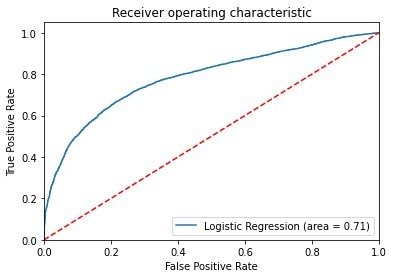

In [93]:
# Plotting ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# Decision Tree

In [94]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [95]:
# List of values to try for max_depth:
max_depth_range = list(range(1, 30))
# List to store the accuracy for each value of max_depth:
accuracy = []
for depth in max_depth_range:
    
    clf = DecisionTreeClassifier(max_depth = depth, 
                             random_state = 0)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    accuracy.append(score)

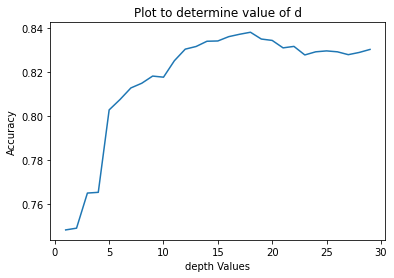

In [96]:
# Plotting Accuarcy vs Value of d
import matplotlib.pyplot as plt
d=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29]
plt.plot(d,accuracy)
plt.title('Plot to determine value of d')
plt.xlabel('depth Values')
plt.ylabel('Accuracy')
plt.show()

In [97]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8288801407153028


In [98]:
# Performance report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.86     15036
           1       0.77      0.77      0.77      8842

    accuracy                           0.83     23878
   macro avg       0.82      0.82      0.82     23878
weighted avg       0.83      0.83      0.83     23878



In [100]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, precision_score, recall_score
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[12943  2093]
 [ 1993  6849]]


In [101]:
total1=sum(sum(confusion_matrix))

# calculate accuracy
accuracy1=(confusion_matrix[0,0]+confusion_matrix[1,1])/total1
print ('Accuracy : ', accuracy1)

# calculate sensitivity
sensitivity1 = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[0,1])
print('Sensitivity : ', sensitivity1 )

# calculate specificity
specificity1 = confusion_matrix[1,1]/(confusion_matrix[1,0]+confusion_matrix[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.8288801407153028
Sensitivity :  0.8608007448789572
Specificity :  0.7745985071250848


In [102]:
# Display the confusion matrix
fig = px.imshow(confusion_matrix, text_auto=True, aspect="auto", color_continuous_scale='darkmint')
figure(figsize=(4, 4), dpi=80)
fig.show()

<Figure size 320x320 with 0 Axes>

In [103]:
#Peformance metrics
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred))) 
print("MAE: ", mean_absolute_error(y_test, y_pred))
print('MSE: ', metrics.mean_squared_error(y_test, y_pred))

RMSE:  0.41366636228329856
MAE:  0.17111985928469722
MSE:  0.17111985928469722


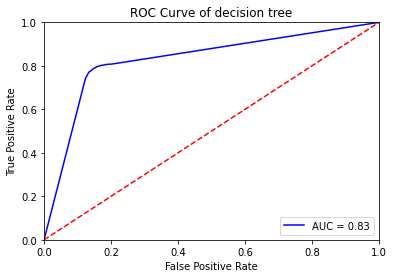

In [104]:
# Plotting ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_scores = clf.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of decision tree')
plt.show()

# KNN

In [105]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
std_scaler.fit(X_train)
std_scaler.fit(X_test)
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [106]:
acc=[]
for i in range(1,16):
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_std, y_train)
  acc.append(knn.score(X_test_std, y_test))
  acc

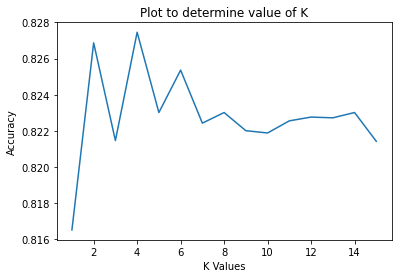

In [107]:
#Plotting Accuracy Vs K values

import matplotlib.pyplot as plt
k=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
plt.plot(k,acc)
plt.title('Plot to determine value of K')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.show()

In [108]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
knn = KNeighborsClassifier(n_neighbors = 11).fit(X_train_std, y_train)
y_pred = knn.predict(X_test_std)

print('Confusion Matrix',confusion_matrix(y_test, y_pred))

print('Precesion Score',precision_score(y_test, y_pred, average='weighted'))

print('Recall Score',recall_score(y_test, y_pred, average='weighted'))

Confusion Matrix [[13523  1513]
 [ 2724  6118]]
Precesion Score 0.8210039834520562
Recall Score 0.82255632800067


In [109]:
a=confusion_matrix(y_test, y_pred)
a

array([[13523,  1513],
       [ 2724,  6118]])

In [110]:
import plotly.express as px

fig = px.imshow(a, text_auto=True, aspect="auto",color_continuous_scale='emrld')
fig.show()

/usr/local/lib/python3.8/dist-packages/sklearn/base.py:443: UserWarning:

X has feature names, but KNeighborsClassifier was fitted without feature names



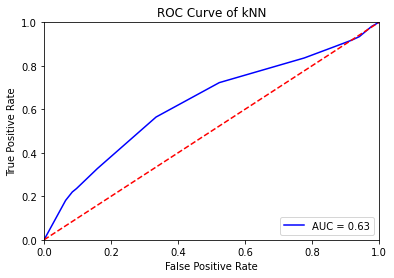

In [111]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
y_scores = knn.predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [112]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     15036
           1       0.80      0.69      0.74      8842

    accuracy                           0.82     23878
   macro avg       0.82      0.80      0.80     23878
weighted avg       0.82      0.82      0.82     23878



In [113]:
total1=sum(sum(a))
#from confusion matrix calculate accuracy
accuracy1=(a[0,0]+a[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = a[0,0]/(a[0,0]+a[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = a[1,1]/(a[1,0]+a[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.82255632800067
Sensitivity :  0.8993748337323756
Specificity :  0.6919249038679032


In [114]:
knn = KNeighborsClassifier(n_neighbors=3).fit(X_train_std, y_train)
scores = cross_val_score(knn, X_train_std, y_train, cv=5)
knn_pred = knn.predict(X_test_std)
print("Average cross validation score: {:.3f}".format(scores.mean()))
print("Test accuracy: {:.3f}".format(knn.score(X_test_std, y_test)))
#print("F1 score: {:.3f}".format(f1_score(y_test, knn_pred)))
#print(confusion_matrix(y_test, knn_pred))

Average cross validation score: 0.819
Test accuracy: 0.821


# Random Forest

In [115]:
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
def classifier(train, test, estimator, param_grid):
    grid_search = GridSearchCV(estimator, param_grid, cv=5)
    grid_search.fit(train, y_train)
    print("Best parameters:", grid_search.best_params_)
    print("Best score:", grid_search.best_score_)
    print("Test score: {:.3f}".format(grid_search.score(test, y_test)))

def feature_selection(model):
    select_features = SelectFromModel(estimator=model, threshold='median')
    select_features.fit(X_train, y_train)
    X_train_select = select_features.transform(X_train)
    X_test_select = select_features.transform(X_test)
    return X_train_select, X_test_select

def run_model(model, model_feature, param_grid):
    print("Before feature selection:")
    classifier(X_train, X_test, model, param_grid)
    X_train_select, X_test_select = feature_selection(model_feature)
    print("After feature selection")
    classifier(X_train_select, X_test_select, model, param_grid)

In [116]:
from sklearn.ensemble import RandomForestClassifier
param_grid = {'n_estimators':[50,75,100], 'max_depth':[1,2,5]}
run_model(RandomForestClassifier(), RandomForestClassifier(n_estimators=50, max_depth=2), param_grid)

Before feature selection:
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.7799333140234941
Test score: 0.768
After feature selection
Best parameters: {'max_depth': 5, 'n_estimators': 75}
Best score: 0.7817763215663838
Test score: 0.800


In [137]:
forest = RandomForestClassifier()
forest.fit(X_train, y_train)

RandomForestClassifier()

In [138]:
# Make predictions for the test set
y_pred = forest.predict(X_test)

In [139]:
accuracy_score(y_test, y_pred)

0.8721835999664963

In [120]:
b=confusion_matrix(y_test, y_pred)
b

array([[13999,  1037],
       [ 2047,  6795]])

In [121]:
print('Confusion Matrix',confusion_matrix(y_test, y_pred))

print('Precesion Score',precision_score(y_test, y_pred, average='weighted'))

print('Recall Score',recall_score(y_test, y_pred, average='weighted'))

Confusion Matrix [[13999  1037]
 [ 2047  6795]]
Precesion Score 0.8706389509376805
Recall Score 0.870843454225647


In [122]:
import plotly.express as px

fig = px.imshow(b, text_auto=True, aspect="auto",color_continuous_scale='emrld')
fig.show()

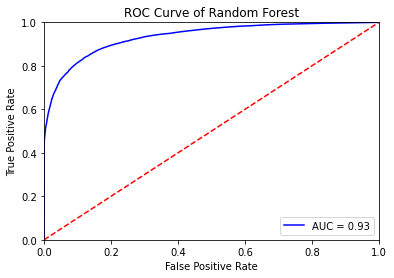

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
y_scores = forest.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()


In [124]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.93      0.90     15036
           1       0.87      0.77      0.82      8842

    accuracy                           0.87     23878
   macro avg       0.87      0.85      0.86     23878
weighted avg       0.87      0.87      0.87     23878



In [125]:
total1=sum(sum(b))
#####from confusion matrix calculate accuracy
accuracy1=(b[0,0]+b[1,1])/total1
print ('Accuracy : ', accuracy1)

sensitivity1 = b[0,0]/(b[0,0]+b[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = b[1,1]/(b[1,0]+b[1,1])
print('Specificity : ', specificity1)

Accuracy :  0.870843454225647
Sensitivity :  0.9310321894120777
Specificity :  0.7684912915629948
